# Lab4
### Import nesssary model

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from IPython.display import Image
np.set_printoptions(precision = 3)

### Load data

In [2]:
data = pd.read_csv("jester-data-1.csv", header=None)
#del data["0"]
#d = data.to_latex()
#text_file = open("Output_lab4_test.txt", "w")
#text_file.write(d)
#text_file.close()

In [3]:
data.columns
del data[data.columns[0]]

In [4]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Prepare the dataset

In [5]:
#user_ratings = data.values
user_ratings = data.values[0:100]

In [6]:
user_ratings_vali = np.zeros(user_ratings.shape) + 99.0
user_ratings_copy = user_ratings.copy() 
count = 0
loc_log = []
for x in range(0,user_ratings.shape[0]):
    for y in range(0,user_ratings.shape[1]):
        if (user_ratings_copy[x,y]!=99.0):
            if (np.random.random() > 0.9):
                count += 1
                temp = user_ratings_copy[x,y]
                user_ratings_copy[x,y] = user_ratings_vali[x,y]
                user_ratings_vali[x,y] = temp
                loc_log.append((x,y))
                #print(temp)
print(user_ratings_vali,'\n', count,'\n', count/(user_ratings.shape[0]*user_ratings.shape[1]))

[[99.   99.   99.   ... 99.   99.   99.  ]
 [ 4.08 -0.29  6.36 ... 99.   -4.32 99.  ]
 [99.   99.   99.   ... 99.   99.   99.  ]
 ...
 [99.   99.   99.   ... 99.   99.   99.  ]
 [99.   99.    4.37 ... 99.   99.   99.  ]
 [99.   99.   99.   ... 99.   99.   99.  ]] 
 713 
 0.0713


In [7]:
loc_log[720]

IndexError: list index out of range

### Prepare the predicte matrix

In [8]:
n_features = 100
latent_user_preferences = np.random.random((user_ratings.shape[0], n_features))
latent_item_features = np.random.random((user_ratings.shape[1],n_features))

In [9]:
print('user_ratings.shape:           ',user_ratings.shape)
print('latent_user_preferences.shape:',latent_user_preferences.shape)
print('latent_item_features.shape:   ',latent_item_features.shape)

user_ratings.shape:            (100, 100)
latent_user_preferences.shape: (100, 100)
latent_item_features.shape:    (100, 100)


In [10]:
user_ratings, user_ratings.shape

(array([[-7.82,  8.79, -9.66, ..., 99.  , 99.  , 99.  ],
        [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
        [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
        ...,
        [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
        [ 3.3 ,  1.31,  4.37, ..., -0.44,  1.17,  6.5 ],
        [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ]]), (100, 100))

In [11]:
np.random.random()

0.893941388309659

### Training function

In [12]:
    train_mse_loglist = []
    test_mse_loglist = []

In [13]:
def predict_rating(user_id,item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)  #linear

def train(user_id, item_id, rating,alpha = 0.001):
    
    #print (item_id)
    prediction_rating = predict_rating(user_id, item_id)
    err =  ( prediction_rating- rating );
    #print (err)
    user_pref_values = latent_user_preferences[user_id][:]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    


def sgd(iterations = 100000):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    err_mse_log = 99999.0
    for iteration in range(0,iterations):
        error = []
        vali_err = []
        for user_id in range(0,latent_user_preferences.shape[0]):
            for item_id in range(0,latent_item_features.shape[0]):
                rating = user_ratings_copy[user_id][item_id]
                if(rating != 99):
                    err = train(user_id,item_id,rating)
                    error.append(err)
                    #print(rating)
        mse = (np.array(error) ** 2).mean()
        train_mse_loglist.append(mse)
        err_mse = mse - err_mse_log
        #if (err_mse>0):
        #    print(mse, err_mse, err_mse_log)
        #    break
        err_mse_log = mse
        for loc in loc_log:
            vali_err.append(user_ratings_vali[loc[0]][loc[1]]-latent_user_preferences[loc[0]].dot(latent_item_features[loc[1]]))
        test_mse = (np.array(vali_err) ** 2).mean()
        test_mse_loglist.append(test_mse)
        #print(iteration)
        if(iteration%100 == 0 ):
            print (iteration, ':=', mse, err_mse)
                    
                    
    

In [14]:
sgd()

0 := 148.84551591319567 -99850.1544840868
100 := 0.11099925513305706 -0.004158766868919764
200 := 0.005764585311086504 -0.00014288605090563393
300 := 0.0006616615248070665 -1.3052198902731575e-05
400 := 0.00010852657157734306 -1.8394374909523945e-06
500 := 2.2564409432203662e-05 -3.3412628975795883e-07
600 := 5.66677126772993e-06 -7.430777793668801e-08
700 := 1.6441884504930931e-06 -1.9522968466053487e-08
800 := 5.283271515800734e-07 -5.8252676870545525e-09
900 := 1.8189436718034997e-07 -1.9020761460778434e-09
1000 := 6.561350747239215e-08 -6.605433816588764e-10
1100 := 2.4454215948560597e-08 -2.39332976990072e-10
1200 := 9.336711593031576e-09 -8.938791537941798e-11
1300 := 3.6326406670870234e-09 -3.415687451583966e-11


KeyboardInterrupt: 

In [15]:
del train_mse_loglist[0]

In [16]:
test_mse_loglist

[42.59238318673593,
 30.78110782188296,
 27.685787829833096,
 26.312056974713634,
 25.46781293506335,
 24.8313359851207,
 24.296081096922883,
 23.824131918745053,
 23.40265674019386,
 23.02813260883802,
 22.699831043562675,
 22.417074726465348,
 22.17828380129353,
 21.980893989427134,
 21.821634055114668,
 21.696875716121053,
 21.60292236080583,
 21.536199493416053,
 21.493358146758492,
 21.47131791829864,
 21.467274823728786,
 21.478692001122365,
 21.503284069449595,
 21.539000560557536,
 21.584010455021588,
 21.636688032624782,
 21.695599495236262,
 21.75948970713832,
 21.82726860285002,
 21.89799711405614,
 21.970872734414694,
 22.04521501501401,
 22.12045135509832,
 22.19610344120883,
 22.271774622331915,
 22.347138417467647,
 22.421928257401266,
 22.4959284787647,
 22.568966523091778,
 22.640906248577593,
 22.711642236268457,
 22.7810949621666,
 22.84920670825064,
 22.91593809477652,
 22.981265130038736,
 23.045176689372646,
 23.107672350655623,
 23.16876052770269,
 23.22845685509

In [17]:
import seaborn as sns

In [18]:
plotdata1 = DataFrame(np.vstack((np.arange(np.array(train_mse_loglist).shape[0]), train_mse_loglist)).T, columns=['iterations', 'train_MSE'])

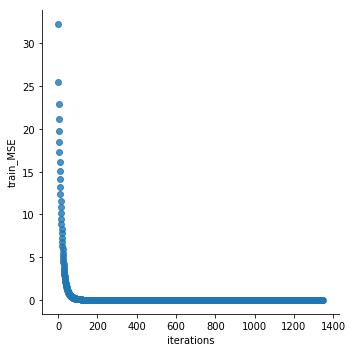

In [19]:
sns_plot = sns.lmplot(plotdata1.columns[0], plotdata1.columns[1], data=plotdata1, fit_reg=False)

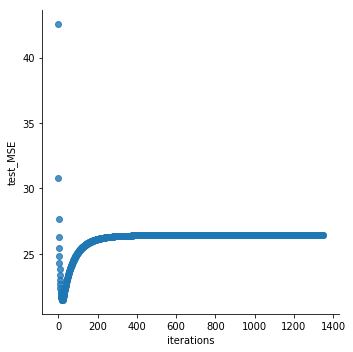

In [20]:
plotdata1 = DataFrame(np.vstack((np.arange(np.array(test_mse_loglist).shape[0]), test_mse_loglist)).T, columns=['iterations', 'test_MSE'])
sns_plot = sns.lmplot(plotdata1.columns[0], plotdata1.columns[1], data=plotdata1, fit_reg=False)

In [21]:
min(test_mse_loglist), test_mse_loglist.index(min(test_mse_loglist)), train_mse_loglist[test_mse_loglist.index(min(test_mse_loglist))+1]

(21.467274823728786, 20, 6.344357515401951)

In [22]:
min(train_mse_loglist), train_mse_loglist.index(min(train_mse_loglist)), 

(2.3438260661951096e-09, 1346)

In [23]:
latent_user_preferences

array([[ 0.897,  0.197,  0.428, ..., -0.399,  0.136,  0.442],
       [-0.167,  1.54 ,  1.302, ...,  0.486,  0.595, -0.176],
       [ 0.096,  0.33 ,  0.199, ..., -0.138,  1.174,  0.19 ],
       ...,
       [-0.214,  0.233,  0.88 , ..., -0.656, -0.115, -0.721],
       [ 0.535, -0.163,  0.42 , ...,  0.66 ,  0.444,  0.189],
       [ 0.829,  0.341,  0.473, ..., -0.426, -0.277, -0.577]])

In [24]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[-7.82 ,  8.79 , -9.66 , ..., -0.937, -0.286, -1.246],
       [ 4.71 ,  4.862,  1.455, ...,  0.34 ,  2.231,  1.07 ],
       [ 9.301,  6.831,  7.701, ..., 12.033,  7.817,  8.199],
       ...,
       [ 4.   ,  1.928,  2.964, ...,  0.901,  0.035,  0.558],
       [ 3.3  ,  1.31 ,  2.916, ..., -0.44 ,  1.17 ,  6.5  ],
       [-0.058,  1.413,  1.014, ...,  0.104,  0.015,  0.193]])

In [ ]:
values = [zip(user_ratings_copy[i], predictions[i]) for i in range(0,predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns
comparison_data.applymap(lambda x: "(%2.3f|%2.3f)"%(x[0],x[1]))
#comparison_data.head()

In [25]:
values = [zip(user_ratings_vali[i], predictions[i]) for i in range(0,predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data_err = []
for x in range(0, comparison_data.shape[1]):
    for y in range(0, comparison_data.shape[0]):
        if (comparison_data[x][y][0] == 99.0):
            comparison_data[x][y] = (0,0)
        else:
            comparison_data_err.append(comparison_data[x][y][0] - comparison_data[x][y][1])
mse = (np.array(comparison_data_err) ** 2).mean()
comparison_data.columns = data.columns
comparison_data.applymap(lambda x: ["(%2.3f|%2.3f)"%(x[0],x[1]) ])

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],...,[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)]
1,[(4.080|4.710)],[(-0.290|4.862)],[(6.360|1.455)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],...,[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(-2.140|1.084)],[(0.000|0.000)],[(0.000|0.000)],[(-4.320|2.231)],[(0.000|0.000)]
2,[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(9.030|10.249)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],...,[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)]
3,[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],...,[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)]
4,[(0.000|0.000)],[(0.000|0.000)],[(-4.170|4.575)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(-0.440|2.938)],[(0.000|0.000)],...,[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(1.550|3.837)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)]
5,[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(-7.090|-0.576)],[(0.000|0.000)],[(-8.690|-1.347)],[(-0.870|-2.403)],[(0.000|0.000)],[(0.000|0.000)],...,[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(-5.050|-4.028)],[(-3.450|-5.993)]
6,[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],...,[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)]
7,[(6.840|4.428)],[(0.000|0.000)],[(0.000|0.000)],[(-6.210|-0.627)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],...,[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)]
8,[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],...,[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)]
9,[(3.010|5.782)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],...,[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)],[(0.000|0.000)]


In [ ]:
mse


In [ ]:
predictions

In [ ]:
latent_item_features

In [ ]:
np.savetxt("predictions_10f_10.csv", predictions, delimiter=",")
np.savetxt("latent_user_preferences_10f_10.csv", latent_user_preferences, delimiter=",")
np.savetxt("latent_item_features_10f_10.csv", latent_item_features, delimiter=",")